<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZNzP9yXcbfiEz2L_VDKcA7UCHRQ_9j0LShMcK-ZH5e7r6D0I8" alt="ÐÐ¾ÑÐ¾Ð¶ÐµÐµ Ð¸Ð·Ð¾Ð±ÑÐ°Ð¶ÐµÐ½Ð¸Ðµ"/>

In [1]:
!git clone https://github.com/QBQR/Trial-assignment.git
!ls "Trial-assignment/data/market_data"

Cloning into 'Trial-assignment'...
remote: Enumerating objects: 1904, done.
remote: Total 1904 (delta 0), reused 0 (delta 0), pack-reused 1904
Receiving objects: 100% (1904/1904), 421.28 MiB | 18.79 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (1903/1903), done.
AA.csv	   BNI.csv    DO.csv	 HAS.csv    LUV.csv   PEG.csv	 SYMC.csv
AAL.csv    BRCM.csv   DOV.csv	 HBAN.csv   LVLT.csv  PEP.csv	 SYY.csv
AAP.csv    BRK.B.csv  DPS.csv	 HBI.csv    LW.csv    PETM.csv	 TAP.csv
AAPL.csv   BSX.csv    DRE.csv	 HCA.csv    LXK.csv   PFE.csv	 T.csv
ABBV.csv   BTUUQ.csv  DRI.csv	 HCBK.csv   LYB.csv   PFG.csv	 TDC.csv
ABC.csv    BWA.csv    DTE.csv	 HCP.csv    MAA.csv   PG.csv	 TDG.csv
ABT.csv    BXLT.csv   DUK.csv	 HD.csv     MAC.csv   PGR.csv	 TEG.csv
ACN.csv    BXP.csv    DVA.csv	 HES.csv    MA.csv    PH.csv	 TEL.csv
A.csv	   CA.csv     DVMT.csv	 HIG.csv    MAR.csv   PHM.csv	 TER.csv
ADBE.csv   CAG.csv    DVN.csv	 HII.csv    MAS.csv   PKG.csv	 TGNA.csv
ADI.csv    CAH.csv    

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5ATliF-sDSVij0o7A8YXt3hx68S7revN5zSloEPSI5EBWXoFa" alt="ÐÐ°ÑÑÐ¸Ð½ÐºÐ¸ Ð¿Ð¾ Ð·Ð°Ð¿ÑÐ¾ÑÑ python import"/>

In [2]:
!pip install datetime
import datetime as dt
from collections import OrderedDict
import pprint

!pip3 install PTable
from prettytable import PrettyTable

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import pandas as pd
import numpy as np

!pip install tqdm
from tqdm import tqdm

from sklearn.model_selection import train_test_split

!pip install backtrader
!pip install pyfolio
import backtrader as bt
import backtrader.feeds as btfeed
from backtrader.analyzers import (SQN, AnnualReturn, TimeReturn, SharpeRatio,
                                  TradeAnalyzer, DrawDown)
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import pyfolio as pf
import warnings


def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

    100% |████████████████████████████████| 61kB 4.0MB/s 
    100% |████████████████████████████████| 174kB 23.8MB/s 
  Running setup.py bdist_wheel for PTable ... - done
  Stored in directory: /root/.cache/pip/wheels/22/cc/2e/55980bfe86393df3e9896146a01f6802978d09d7ebcba5ea56
Successfully built PTable


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


    100% |████████████████████████████████| 419kB 13.9MB/s 
    100% |████████████████████████████████| 92kB 5.4MB/s 
    100% |████████████████████████████████| 51kB 17.7MB/s 
    100% |████████████████████████████████| 112kB 13.7MB/s 
  Running setup.py bdist_wheel for pyfolio ... - done
  Stored in directory: /root/.cache/pip/wheels/37/9b/a6/199481975c168cc22c6161fbf8a6f0e6037d6e2faf2d0fba53
  Running setup.py bdist_wheel for empyrical ... - done
  Stored in directory: /root/.cache/pip/wheels/83/14/73/34fb27552601518d28bd0813d75124be76d94ab29152c69112
  Running setup.py bdist_wheel for bottleneck ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
Successfully built pyfolio empyrical bottleneck


In [0]:
def viz_data(label, features):
  dataviz = []
  main_df = pd.DataFrame()
  tickers = np.array(features)
  tickers = np.append(tickers, label)
  print (tickers)
  enable_plotly_in_cell()
  for count, ticker in enumerate (tickers):
    df = pd.read_csv("Trial-assignment/data/market_data/{}.csv".format(ticker))
    df.set_index('dt', inplace = True)
    df.rename (columns = {'close': ticker}, inplace = True)
    df.drop (['open', 'high', 'low', 'volume'], 1, inplace = True)
    
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join (df, how = 'outer')
    dataviz.append(go.Scatter(
      x = main_df.index.values,
      y = main_df[ticker].values,
      name = ticker
    ))
  
  print (main_df.head())
  
  layout = go.Layout(dict(title = "Closing prices for {} ".format(str(tickers)),
                xaxis = dict(title = 'DateTime'),
                yaxis = dict(title = 'Price (USD)'),
                ),legend=dict(
                orientation="h"))
  py.iplot(dict(data=dataviz, layout=layout), show_link = False)
  

![alt text](https://discoversdkcdn.azureedge.net/postscontent/python/PrettyTable.png)

In [0]:
def dict_to_table(dct):
  ptable = PrettyTable()
  
  for key, value in dct.items():
    
    if isinstance(value, dict):
      
      x_tbl = dict_to_table(value)
      ptable.add_column(str(key), [x_tbl])
      
    else:
      
      ptable.add_column(str(key), [value])

  return  ptable

![alt text](https://discoinver.com/wp-content/uploads/2017/12/dautu6-1-235x150.jpg)

** Обработчик стратегий**

In [0]:
class My_Strategy(bt.Strategy):
    # Обработчик стратегий
  params = dict(
      period = 0,
      stake = 10,
      printout = True,
  )
  
  def log(self, txt, dt=None):
    
      dt = dt or self.data.datetime[0]
      dt = bt.num2date(dt)
      print ('{} {}'.format(dt.isoformat(), txt))
  
  def __init__(self):
    self.order = None
    self.buyprice = None
    self.buycomm = None
    
    
  def next(self):
    
    '''
  
  
    '''
    
    if self.order:
         return # если есть не исполненный ордер - возврат. 
    
   
    if self.p.printout:
      print (' ---------------- СИНХРОНИЗИРУЕМ ДАННЫЕ -------------------------')
      print('Self len:', len(self))
      print('Data0 len:', len(self.data0))
      print('Data1 len:', len(self.data1))
      
      print('Data0 len == Data1 len:',
           len(self.data0) == len(self.data1))
      
      print('Data0 dt:', self.data0.datetime.datetime())
      print('Data1 dt:', self.data1.datetime.datetime())
      
      self.p.printout = False
      
      self.log('Первый Close label, {}'.format(self.data0.close[0]))
      print ('Стартовая позиция - {}'.format(self.position))
      print ('Запускаем бэктестинг стратегии')
      print (' ')
      
    if not self.position:  
       # Entry long
      if self.data1.high[0]:
          # Покупаем
        self.log('Открываем LONG, {}, сигнал - {}, = {}'.format(self.data0.close[0], self.data1.high[0], self.data1.volume[0]))
        print ('-1 = ', self.data0.close[-1], '+1 = ', self.data0.close[1])
          # Отслеживаем покупку
        self.order = self.buy(data = self.data0)
      elif self.data1.low[0]:
          #  Продаем
        self.log('Открываем SHORT, {}, сигнал - {}, = {}'.format(self.data0.close[0], self.data1.high[0], self.data1.volume[0]))
        print ('-1 = ', self.data0.close[-1], '+1 = ', self.data0.close[1])
          #Отслеживаем продажи
        self.order = self.sell(data = self.data0)
        
    else:    
      
      if self.position.size > 0:
        
      # есть позиция
        if not self.data1.high[0]:
          
          #  Продаем (Cover Short)
          self.log('Открываем Cover LONG, {}, сигнал - {}, = {}'.format(self.data0.close[0], self.data1.high[0], self.data1.volume[0]))
          print ('-1 = ', self.data0.close[-1], '+1 = ', self.data0.close[1])
          #Отслеживаем продажи
          self.order = self.sell(data = self.data0)
          
      elif self.position.size < 0:
        
        if not self.data1.low[0]:
          
          #  Продаем (Cover Short)
          self.log('Открываем Cover SHORT, {}, условие {}, ={}'.format(self.data0.close[0], self.data1.high[0], self.data1.volume[0]))
          print ('-1 = ', self.data0.close[-1], '+1 = ', self.data0.close[1])
          #Отслеживаем продажи
          self.order = self.buy(data = self.data0)
          

  def notify_order(self, order):
    if order.status in [order.Submitted, order.Accepted]:
      return
    
    # Проверяем, если ордер исполнен
    # Ордер можети быть отклонен брокером, если недостаточно средств 
    if order.status in [order.Completed]:
      if order.isbuy():
        self.log('Куплено по цене={}, объём={} коммиссия={}'.format(order.executed.price, 
                                           order.executed.value, 
                                           order.executed.comm))
        print (' ')
        self.buyprice = order.executed.price
        self.buycomm = order.executed.comm
      #elif order.issell():
      else:
        self.log('Продано по цене={}, объём={} коммиссия={}'.format(order.executed.price, 
                                                                      order.executed.value, 
                                                                      order.executed.comm))
        print (' ')
      self.bar_executed = len(self)
      
    elif order.status in [order.Canceled, order.Margin, order.Rejected]:
      self.log('Ордер Отменен\Отклонен')
    
  # нет ордеров в очереди
    self.order = None
    
  def notify_trade(self, trade):
    if not trade.isclosed:
      return
    
    self.log('Операционная прибыль, Gross= {}, Net= {} '.format(trade.pnl, trade.pnlcomm))
    print('Current Portfolio Value: {}'.format(self.broker.getvalue()))
    print (' ')
    print ('----------------------------------------------- ')
    print (' ')

![alt text](http://qalib.ru/images/1-1402863232866.jpg)

**Настройки бэктестинга**

In [0]:
#@title Параметры запуска бэктестинга
def btstart(lbl_list, dfpredicted, st_name, btanz = True, btplot = True, btpyfolio = False):
    # передаем label_list, feat_list, st_name
    
    # Запускаем cerebro
  cerebro = bt.Cerebro()
    # Подключаем стратегию
  cerebro.addstrategy(st_name)
  
    # Загружаем прогнозируемый ряд
  dflabel = pd.read_csv("Trial-assignment/data/market_data/{}.csv".format(lbl_list[0]),           
                   index_col = ('dt'),
                   parse_dates = True,                                    
                  )
  print ('------загружаем {} -------'.format(lbl_list[0]))
  print (dflabel.head())
  
    # передаем на бэктестинг
  data0 = bt.feeds.PandasData(
    dataname = dflabel,
    datetime = None,
    name = 'data0',
    fromdate = fromdate,
    timeframe = bt.TimeFrame.Minutes,
    plot = True,
  )
  
    # Присоединяем данные: прогнозируемый ряд
  cerebro.adddata(data0)
  
 
  
  
    # Присоединяем сигнальный DataFeed
  data1 = bt.feeds.PandasData(
    dataname = dfpredicted,
    datetime = None,
    name = 'data1',
    fromdate = fromdate,
    timeframe = bt.TimeFrame.Minutes,
    plot = False,
  )
  
  cerebro.adddata(data1)
    
  print ('------------------ Данные присоединины ------------------------')

  #@markdown     **Начальный капитал**
  Init_cash = 100000 #@param {type:"slider", min:100000, max:1000000, step:100000}
  #@markdown     **Размер позиции**
  Init_size = 100 #@param {type:"slider", min:10, max:1000, step:10}
  #@markdown     **Тип коммиссии**
  Comm_Type = bt.CommInfoBase.COMM_FIXED #@param ["bt.CommInfoBase.COMM_FIXED", "bt.CommInfoBase.COMM_PERC"] {type:"raw"}
  #@markdown **Размер коммиссии на сторону USD**
  Comm_Size = 0.005 #@param {type:"raw"}
  
  
    # Начальный капитал = 100 000
  cerebro.broker.setcash(Init_cash)
    # Фиксировный объём = 10
  cerebro.addsizer(bt.sizers.FixedSize, stake = Init_size)
    # коммиссия = 0.1%
  cerebro.broker.setcommission(commtype = Comm_Type, 
                               commission = Comm_Size,
                               stocklike = True)  

  print('Starting Portfolio Value: {}'.format(cerebro.broker.getvalue()))
  
    # Подключаем мониторинг показателей стратегии
  if btanz:
    cerebro.addanalyzer(AnnualReturn, _name = 'AnRet')
    cerebro.addanalyzer(SharpeRatio, _name = 'ShRet')
    cerebro.addanalyzer(TradeAnalyzer, _name = 'TrAn')
    cerebro.addanalyzer(DrawDown, _name = 'DrDo')
    cerebro.addanalyzer(SQN, _name = 'SyQuNu')
    
  if btpyfolio:
    cerebro.addanalyzer(bt.analyzers.PyFolio, _name = 'pyfolio')
  
  cerebro.addobserver(bt.observers.DrawDown)
  
  results = cerebro.run(oldsync = True)
  print('Final Portfolio Value: {}'.format(cerebro.broker.getvalue()))
  
  result = results[0]
  
  if btanz:
    print ('----------------- Trade_Analyzer ---------------------')
    Trade_Analyzer = result.analyzers.getbyname('TrAn')
    p_table = dict_to_table(Trade_Analyzer.get_analysis())
    print (p_table)
    
    print ('-----------------Annual Return ---------------------')
    Annual_Return = result.analyzers.getbyname('AnRet')
    p_table = dict_to_table(Annual_Return.get_analysis())
    print (p_table)     
    
    print ('-----------------Sharpe Ratio ---------------------')
    Sharpe_Ratio = result.analyzers.getbyname('ShRet')
    p_table = dict_to_table(Sharpe_Ratio.get_analysis())
    print (p_table)   
    
    print ('-----------------SQN ---------------------')
    S_Q_N = result.analyzers.getbyname('SyQuNu')
    p_table = dict_to_table(S_Q_N.get_analysis())
    print (p_table)
           
    print ('-----------------DrawDown ---------------------')
    Draw_Down = result.analyzers.getbyname('DrDo')
    p_table = dict_to_table(Draw_Down.get_analysis())
    print (p_table)            
           
  if btplot:
    warnings.filterwarnings('ignore')
    #cerebro.plot(numfigs = 25)
    cerebro.plot()
  if btpyfolio:    
    pyfoliozer = result.analyzers.getbyname('pyfolio')
    returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
    #print ('--- Returns')
    #print (returns)
    #print ('--- Position')
    #print (positions)
    #print ('--- Transactions')
    #print (transactions)
    #print ('--- Gross Leverage')
    #print (gross_lev)
    warnings.filterwarnings('ignore')
    pf.create_full_tear_sheet(
      returns,
      positions = positions,
      transactions = transactions,
      #live_start_date = '2005-05-01',
      round_trips = True
    )

![alt text](http://inetmari.ru/wp-content/uploads/2011/05/%D1%81%D0%B0%D0%BC%D0%BE%D0%B0%D0%BA%D1%82%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.jpg)

**Период для бэктестинга**

In [0]:
#@title Период времени
#@markdown **Начало мин = 04-01-2010**
start_dt = '2010-01-04' #@param {type:"date"}
#@markdown **Окончание макс = 01-06-2016**
end_dt = '2016-06-01' #@param {type:"date"}
fromdate = dt.datetime(int(start_dt[0:4]), int(start_dt[6]), int(start_dt[9]))
livedate = dt.datetime(int(end_dt[0:4]), int(end_dt[6]), int(end_dt[9]))
#fromdate = dt.datetime (2010, 1, 4)
#livedate = dt.datetime (2016, 6, 1  

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRw1vUAc7AEhxCirA3wat1wmR_GAF_U2qPObx1m1U4BolXJiG5x" alt="ÐÐ¾ÑÐ¾Ð¶ÐµÐµ Ð¸Ð·Ð¾Ð±ÑÐ°Ð¶ÐµÐ½Ð¸Ðµ"/>

Создаем модели

### Computers Industry group

IBM  = (CTSH / 201.9428) + (SMA(TDC,84) * (SMA(SNDK,52)))  
----------------
Сигнал:

Buy Long if Predicted >= -3186.142

Sell Long if Predicted < -3186.142

Sell Short if Predicted <= -3188.966

Cover Short if Predicted > -3188.966


In [0]:
feat_list = ['TDC','SNDK', 'CTSH']
label_list = ['IBM']

In [0]:
viz_data(label_list, feat_list)

Output hidden; open in https://colab.research.google.com to view.

**Генерим сигналы на покупку и продажу**

In [0]:
#@title Пороги входа - выхода

Long_Treshold = -3186.142 #@param {type:"number"}
Short_Threshold = -3188.966 #@param {type:"number"}


dffeatures1 = pd.read_csv("Trial-assignment/data/market_data/{}.csv".format(feat_list[0]),
                   index_col = ('dt'),
                   parse_dates = True,
                  )
print (dffeatures1.head())
dffeatures2 = pd.read_csv("Trial-assignment/data/market_data/{}.csv".format(feat_list[1]),
                   index_col = ('dt'),
                   parse_dates = True,
                  )
print (dffeatures2.head())
dffeatures3 = pd.read_csv("Trial-assignment/data/market_data/{}.csv".format(feat_list[2]),
                   index_col = ('dt'),
                   parse_dates = True,
                  )
print (dffeatures3.head())
dfpredicted = pd.DataFrame()
dfpredicted['open'] = dffeatures3.open / dffeatures3.open
dfpredicted['high'] = ((dffeatures3.close / 201.9428) - (dffeatures1.close.rolling(84).mean()  * dffeatures2.close.rolling(52).mean())) >= Long_Treshold
dfpredicted['low'] = ((dffeatures3.close / 201.9428) - (dffeatures1.close.rolling(84).mean()  * dffeatures2.close.rolling(52).mean())) <= Short_Threshold
dfpredicted['close'] = dffeatures3.close / dffeatures3.close
dfpredicted['volume'] = dffeatures3.close / dffeatures3.close
print(dfpredicted.head())

                      open    high    low  close  volume
dt                                                      
2010-01-04 09:45:00  31.78  31.780  31.07  31.08  125550
2010-01-04 10:00:00  31.08  31.250  30.83  30.85  249226
2010-01-04 10:15:00  30.87  30.968  30.80  30.91  523944
2010-01-04 10:30:00  30.90  30.940  30.61  30.79  640252
2010-01-04 10:45:00  30.81  30.860  30.80  30.85  681347
                        open   high    low    close   volume
dt                                                          
2010-01-04 09:45:00  29.7000  29.89  29.50  29.7300   669563
2010-01-04 10:00:00  29.7300  29.84  29.64  29.7300  1142717
2010-01-04 10:15:00  29.7400  29.79  29.66  29.7805  1593178
2010-01-04 10:30:00  29.7900  29.80  29.66  29.7401  2106424
2010-01-04 10:45:00  29.7475  29.99  29.72  29.9800  2910979
                        open   high    low  close  volume
dt                                                       
2010-01-04 09:45:00  45.9600  46.47  45.64  46.24  310521


![alt text](https://www.mtbank.by/media/Malyjbiznes/Newpages/start-up.png)

**Запускаеи бэктестинг**


------загружаем IBM -------
                        open      high     low     close   volume
dt                                                               
2010-01-04 09:45:00  131.180  132.2500  130.85  132.2300   840959
2010-01-04 10:00:00  132.230  132.7600  132.12  132.7600  1280817
2010-01-04 10:15:00  132.760  132.9700  132.60  132.7995  1761942
2010-01-04 10:30:00  132.800  132.8996  132.63  132.8200  1953754
2010-01-04 10:45:00  132.836  132.8875  132.61  132.7600  2126073
------------------ Данные присоединины ------------------------
Starting Portfolio Value: 100000
 ---------------- СИНХРОНИЗИРУЕМ ДАННЫЕ -------------------------
Self len: 1
Data0 len: 1
Data1 len: 1
Data0 len == Data1 len: True
Data0 dt: 2010-01-04 09:45:00
Data1 dt: 2010-01-04 09:45:00
2010-01-04T09:45:00 Первый Close label, 132.23
Стартовая позиция - --- Position Begin
- Size: 0
- Price: 0.0
- Price orig: 0.0
- Closed: 0
- Opened: 0
- Adjbase: None
--- Position End
Запускаем бэктестинг стратегии
 
201

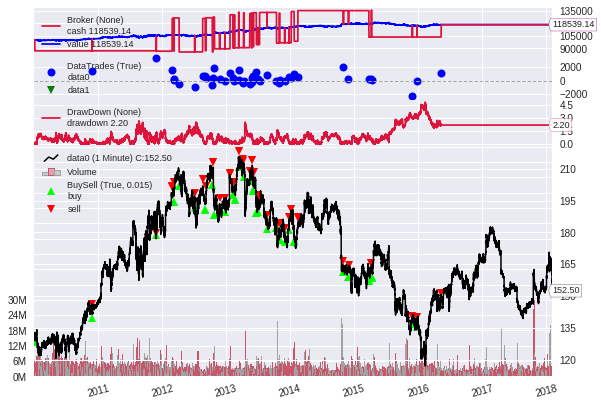

In [0]:
st_name = My_Strategy
btstart(label_list, dfpredicted, st_name)

![alt text](http://wfiles.brothersoft.com/s/s_s/sasha-pivovarova-wallpaper_104719-160x120.jpg)

** 2-ая модель**


### Computers Industry group

IBM  = 9832.378 / (SMA(SNDK,100) - ROC(SNDK,90))  
----------------
Сигнал:

  Buy Long if Predicted >= 184.3761
  
  Sell Long if Predicted < 184.3761
  
  Sell Short if Predicted <= 184.3432
  
  Cover Short if Predicted > 184.3432


In [0]:
feat_list = ['SNDK']
label_list = ['IBM']

In [9]:
viz_data(label_list, feat_list)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
#@title Пороги входа - выхода

Long_Treshold = 184.3761 #@param {type:"number"}
Short_Threshold = 184.3432 #@param {type:"number"}

dffeatures1 = pd.read_csv("Trial-assignment/data/market_data/{}.csv".format(feat_list[0]),
                   index_col = ('dt'),
                   parse_dates = True,
                  )

dfpredicted = pd.DataFrame()
dfpredicted['open'] = dffeatures1.open / dffeatures1.open
dfpredicted['high'] = 9832.378 / (dffeatures1.close.rolling(100).mean() - dffeatures1.close / dffeatures1.close.shift(90))  >= Long_Treshold
dfpredicted['low'] = 9832.378 / (dffeatures1.close.rolling(100).mean() - dffeatures1.close / dffeatures1.close.shift(90)) <= Short_Threshold
dfpredicted['close'] = dffeatures1.close / dffeatures1.close
dfpredicted['volume'] = 9832.378 / (dffeatures1.close.rolling(100).mean() - dffeatures1.close / dffeatures1.close.shift(90))
print(dfpredicted.head(10))

                     open   high    low  close  volume
dt                                                    
2010-01-04 09:45:00   1.0  False  False    1.0     NaN
2010-01-04 10:00:00   1.0  False  False    1.0     NaN
2010-01-04 10:15:00   1.0  False  False    1.0     NaN
2010-01-04 10:30:00   1.0  False  False    1.0     NaN
2010-01-04 10:45:00   1.0  False  False    1.0     NaN
2010-01-04 11:00:00   1.0  False  False    1.0     NaN
2010-01-04 11:15:00   1.0  False  False    1.0     NaN
2010-01-04 11:30:00   1.0  False  False    1.0     NaN
2010-01-04 11:45:00   1.0  False  False    1.0     NaN
2010-01-04 12:00:00   1.0  False  False    1.0     NaN


![alt text](https://www.mtbank.by/media/Malyjbiznes/Newpages/start-up.png)

**Запускаеи бэктестинг**


------загружаем IBM -------
                        open      high     low     close   volume
dt                                                               
2010-01-04 09:45:00  131.180  132.2500  130.85  132.2300   840959
2010-01-04 10:00:00  132.230  132.7600  132.12  132.7600  1280817
2010-01-04 10:15:00  132.760  132.9700  132.60  132.7995  1761942
2010-01-04 10:30:00  132.800  132.8996  132.63  132.8200  1953754
2010-01-04 10:45:00  132.836  132.8875  132.61  132.7600  2126073
------------------ Данные присоединины ------------------------
Starting Portfolio Value: 100000
 ---------------- СИНХРОНИЗИРУЕМ ДАННЫЕ -------------------------
Self len: 1
Data0 len: 1
Data1 len: 1
Data0 len == Data1 len: True
Data0 dt: 2010-01-04 09:45:00
Data1 dt: 2010-01-04 09:45:00
2010-01-04T09:45:00 Первый Close label, 132.23
Стартовая позиция - --- Position Begin
- Size: 0
- Price: 0.0
- Price orig: 0.0
- Closed: 0
- Opened: 0
- Adjbase: None
--- Position End
Запускаем бэктестинг стратегии
 
201

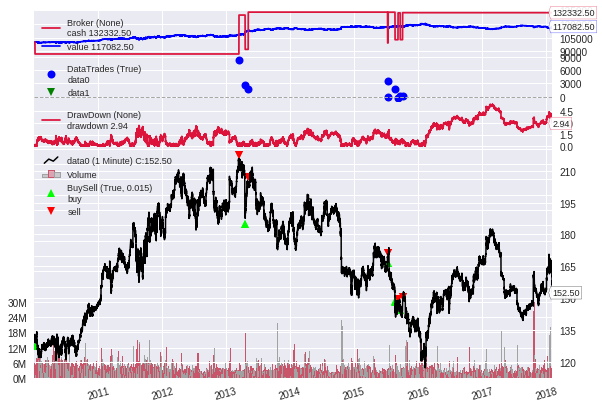

In [11]:
st_name = My_Strategy
btstart(label_list, dfpredicted, st_name)

![alt text](http://abiturient.swsu.ru/sites/default/files/styles/photo_special/public/field/image/svyaz.jpg?itok=bhNSd1oP)

***Модель телекоммуникационного сектора***

### CSCO = (exp(MSI) / (SMA(TMUS,32) - 7.554178 )) - (2 x TMUS x exp(SMA(VIAV,28)))

Сигнал:
 
 Buy Long if Predicted >= -2295.179
 
 Sell Long if Predicted < -2295.179
 
 Sell Short if Predicted <= -3427.079
 
 Cover Short if Predicted > -3427.079



In [0]:
feat_list = ['MSI', 'TMUS', 'VIAV']
label_list = ['CSCO']

In [10]:
viz_data(label_list, feat_list)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
#@title Пороги входа - выхода

Long_Treshold = -2295.179 #@param {type:"number"}
Short_Threshold = -3427.079 #@param {type:"number"}

dffeatures1 = pd.read_csv("Trial-assignment/data/market_data/{}.csv".format(feat_list[0]),
                   index_col = ('dt'),
                   parse_dates = True,
                  )
dffeatures2 = pd.read_csv("Trial-assignment/data/market_data/{}.csv".format(feat_list[1]),
                   index_col = ('dt'),
                   parse_dates = True,
                  )
dffeatures3 = pd.read_csv("Trial-assignment/data/market_data/{}.csv".format(feat_list[2]),
                   index_col = ('dt'),
                   parse_dates = True,
                  )
#CSCO = (exp(MSI) / (SMA(TMUS,32) - 7.554178 )) - (2 x TMUS x exp(SMA(VIAV,28)))
dfpredicted = pd.DataFrame()
dfpredicted['open'] = dffeatures1.open 
dfpredicted['high'] = (np.exp(dffeatures1.close) / (dffeatures2.close.rolling(32).mean() - 7.554178)) - 2 * dffeatures2.close * np.exp(dffeatures3.close.rolling(28).mean()) >= Long_Treshold
dfpredicted['low'] = (np.exp(dffeatures1.close) / (dffeatures2.close.rolling(32).mean() - 7.554178)) - 2 * dffeatures2.close * np.exp(dffeatures3.close.rolling(28).mean()) <= Short_Threshold
dfpredicted['close'] = dffeatures1.close
dfpredicted['volume'] = (np.exp(dffeatures1.close) / (dffeatures2.close.rolling(32).mean() - 7.554178)) - 2 * dffeatures2.close * np.exp(dffeatures3.close.rolling(28).mean())
print(dfpredicted.tail(10))

                       open  high    low    close        volume
dt                                                             
2018-02-05 13:45:00  103.82  True  False  103.600  1.751485e+43
2018-02-05 14:00:00  103.67  True  False  103.700  1.936585e+43
2018-02-05 14:15:00  103.70  True  False  103.630  1.806615e+43
2018-02-05 14:30:00  103.62  True  False  103.420  1.465262e+43
2018-02-05 14:45:00  103.38  True  False  103.270  1.262017e+43
2018-02-05 15:00:00  103.31  True  False  103.050  1.013634e+43
2018-02-05 15:15:00  103.03  True  False  102.920  8.909920e+42
2018-02-05 15:30:00  102.96  True  False  103.300  1.303955e+43
2018-02-05 15:45:00  103.30  True  False  102.555  6.196660e+42
2018-02-05 16:00:00  102.60  True  False  101.730  2.719581e+42


------загружаем CSCO -------
                       open   high    low    close    volume
dt                                                          
2010-01-04 09:45:00  24.110  24.30  24.01  24.3000   4817321
2010-01-04 10:00:00  24.300  24.43  24.29  24.3700   8009078
2010-01-04 10:15:00  24.375  24.49  24.26  24.4810  11174903
2010-01-04 10:30:00  24.490  24.50  24.45  24.4910  13382552
2010-01-04 10:45:00  24.500  24.64  24.48  24.6305  17319954
------------------ Данные присоединины ------------------------
Starting Portfolio Value: 100000
 ---------------- СИНХРОНИЗИРУЕМ ДАННЫЕ -------------------------
Self len: 1
Data0 len: 1
Data1 len: 1
Data0 len == Data1 len: True
Data0 dt: 2010-01-04 09:45:00
Data1 dt: 2010-01-04 09:45:00
2010-01-04T09:45:00 Первый Close label, 24.3
Стартовая позиция - --- Position Begin
- Size: 0
- Price: 0.0
- Price orig: 0.0
- Closed: 0
- Opened: 0
- Adjbase: None
--- Position End
Запускаем бэктестинг стратегии
 
2010-01-05T11:00:00 Открываем SHORT, 24

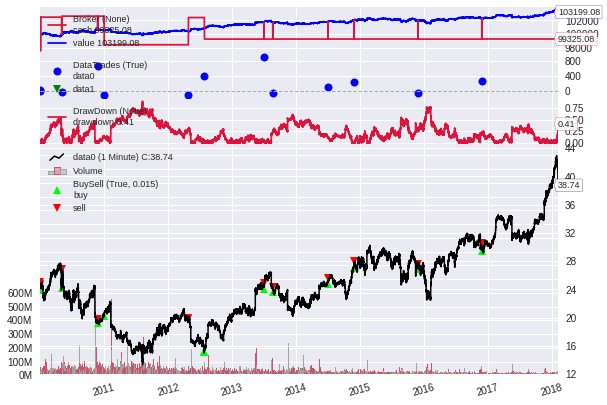

In [15]:
st_name = My_Strategy
btstart(label_list, dfpredicted, st_name)